In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
pd.options.display.max_rows = 4000
pd.options.display.max_seq_items = 2000
pd.set_option('display.max_colwidth', -1)

In [3]:
ed_country = pd.read_csv("~\Desktop\dss_sp19\EdStatsCountry.csv")

In [4]:
ed_data = pd.read_csv("~\Desktop\dss_sp19\EdStatsData.csv")

In [5]:
region_count = ed_country.groupby("Region").size()
region_count

Region
East Asia & Pacific           36
Europe & Central Asia         57
Latin America & Caribbean     41
Middle East & North Africa    21
North America                 3 
South Asia                    8 
Sub-Saharan Africa            48
dtype: int64

In [66]:
by_region = ed_country.sort_values("Region")[["Country Code", "Short Name", "Region", "Income Group"]]
only_east_asia = by_region[by_region["Region"] == "East Asia & Pacific"]

In [71]:
countries_to_2017 = ed_data.iloc[:, :52] #table went all the way to 2100, so I took out the years that have not occurred yet
countries_to_2017.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
china_data = countries_to_2017[countries_to_2017['Country Code'] == 'CHN']
china_data = china_data.drop(columns=["Country Name", "Country Code", "Indicator Code"]) #without "China" label
china_row_counts = china_data.apply(lambda x: x.count(), axis=1)
china_data['Row Count'] = china_row_counts
china_data = china_data[china_data['Row Count'] > 30]
china_data_w_row_count = china_data #with row count
china_data = china_data.drop(columns=["Row Count"]) #dropped row count column
china_data["Indicator Name"]

243023    Enrolment in Grade 1 of lower secondary general education, both sexes (number)                    
243025    Enrolment in Grade 1 of primary education, both sexes (number)                                    
243067    Enrolment in pre-primary education, both sexes (number)                                           
243068    Enrolment in pre-primary education, female (number)                                               
243073    Enrolment in primary education, both sexes (number)                                               
243074    Enrolment in primary education, female (number)                                                   
243081    Enrolment in secondary education, both sexes (number)                                             
243082    Enrolment in secondary education, female (number)                                                 
243087    Enrolment in secondary general, both sexes (number)                                               
243088    Enrolment

In [134]:
china_years = [x for x in range(1970,2018)]

In [225]:
china_total_pop = china_data[china_data['Indicator Name'] == 'Population, total'].transpose()
china_0_to_14_pop = china_data[china_data['Indicator Name'] == "Population, ages 0-14, total"].transpose()
china_15_to_64_pop = china_data[china_data['Indicator Name'] == "Population, ages 15-64, total"].transpose()

china_pop_age = china_total_pop.merge(china_0_to_14_pop, left_index=True, right_index=True).merge(china_15_to_64_pop, left_index=True, right_index=True)
china_pop_age = china_pop_age.rename(columns={244423: "Population, total", 
                                             244312: "Population, ages 0-14, total",
                                             244376: "Population, ages 15-64, total"})
china_pop_age = china_pop_age.drop(["Indicator Name"])
china_pop_age["Year"] = china_years #made year into a column
china_pop_age = china_pop_age.dropna(axis=0, how="any") #no nan
china_pop_age = china_pop_age[["Year", 
                               "Population, total", 
                               "Population, ages 0-14, total", 
                               "Population, ages 15-64, total"]]

china_pop_age.head()

,Year,"Population, total","Population, ages 0-14, total","Population, ages 15-64, total"
1970,1970,8.18315e+08,3.30253e+08,4.57286e+08
1971,1971,8.41105e+08,3.39415e+08,4.69451e+08
1972,1972,8.6203e+08,3.47731e+08,4.80681e+08
1973,1973,8.8194e+08,3.55343e+08,4.91635e+08
1974,1974,9.0035e+08,3.61235e+08,5.0281e+08


Text(0.5, 0, 'Year')

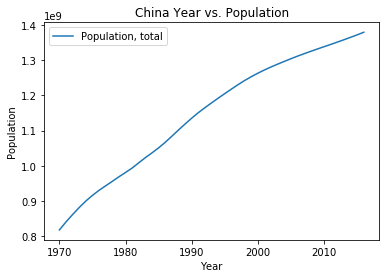

In [238]:
china_pop_age.plot("Year", "Population, total")

plt.title('China Year vs. Population')
plt.ylabel("Population")
plt.xlabel("Year")

Text(0.5, 0, 'Year')

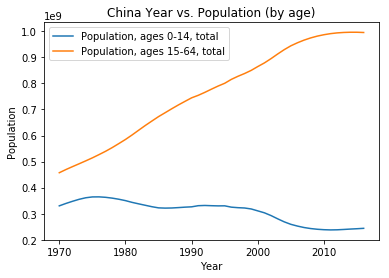

In [239]:
china_pop_age.drop(columns=["Population, total"]).plot("Year")

plt.title('China Year vs. Population (by age)')
plt.ylabel("Population")
plt.xlabel("Year")

In [209]:
china_primary_enroll = china_data[china_data['Indicator Name'] == 'Enrolment in primary education, both sexes (number)'].transpose()
#transposed to make the rows years
china_secondary_enroll = china_data[china_data['Indicator Name'] == 'Enrolment in secondary education, both sexes (number)'].transpose()
china_tertiary_enroll = china_data[china_data['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)'].transpose()
china_enroll_all_levels = china_primary_enroll.merge(china_secondary_enroll, left_index=True, right_index=True).merge(china_tertiary_enroll, left_index=True, right_index=True)

china_gdp_per_capita = china_data[china_data['Indicator Name'] == 'GDP per capita (current US$)'].transpose()

In [210]:
china_enrollment_and_gdp = china_gdp_per_capita.merge(china_enroll_all_levels, left_index=True, right_index=True)
china_enrollment_and_gdp = china_enrollment_and_gdp.rename(columns={243073: "Enrollment in primary education, both sexes (number)",
                                                                    243081: "Enrollment in secondary education, both sexes (number)",
                                                                    243094: "Enrollment in tertiary education, all programmes, both sexes (number)",
                                                                    243135: "GDP per capita (current US$)"})
china_enrollment_and_gdp = china_enrollment_and_gdp.drop(["Indicator Name"])
china_enrollment_and_gdp["Year"] = china_years #made year into a column
china_enrollment_and_gdp = china_enrollment_and_gdp.dropna(axis=0, how="any") #no nan
china_enrollment_and_gdp = china_enrollment_and_gdp[["Year", 
                          "GDP per capita (current US$)", 
                          "Enrollment in primary education, both sexes (number)", 
                          "Enrollment in secondary education, both sexes (number)", 
                          "Enrollment in tertiary education, all programmes, both sexes (number)"]] #made Year column first
china_enrollment_and_gdp.head()

,Year,GDP per capita (current US$),"Enrollment in primary education, both sexes (number)","Enrollment in secondary education, both sexes (number)","Enrollment in tertiary education, all programmes, both sexes (number)"
1970,1970,113.163,1.00668e+08,2.02534e+07,108617
1973,1973,157.09,1.25492e+08,3.61669e+07,193719
1974,1974,160.14,1.35704e+08,3.49468e+07,313645
1975,1975,178.342,1.44814e+08,3.71379e+07,429981
1976,1976,165.406,1.50941e+08,4.53684e+07,500993


Text(0.5, 0, 'Year')

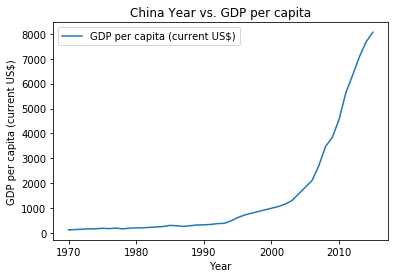

In [208]:
china_enrollment_and_gdp.plot("Year", "GDP per capita (current US$)")

plt.title('China Year vs. GDP per capita')
plt.ylabel("GDP per capita (current US$)")
plt.xlabel("Year")

Text(0.5, 0, 'GDP per capita (current US$)')

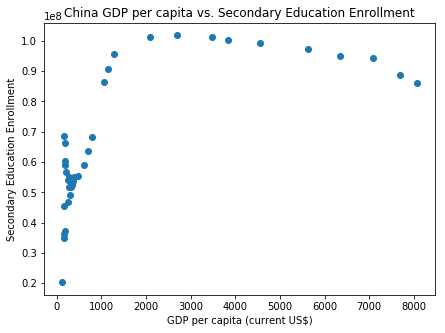

In [229]:
plt.figure(figsize=(7, 5))

plt.scatter(china_enrollment_and_gdp["GDP per capita (current US$)"],
                                    china_enrollment_and_gdp["Enrollment in secondary education, both sexes (number)"])

plt.title('China GDP per capita vs. Secondary Education Enrollment')
plt.ylabel("Secondary Education Enrollment")
plt.xlabel("GDP per capita (current US$)")

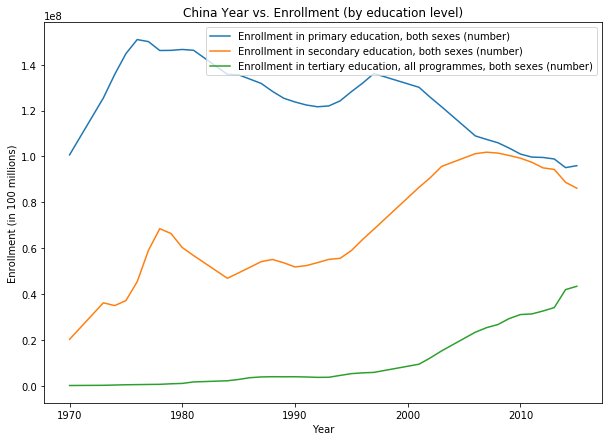

In [197]:
only_china_enrollment = china_enrollment_and_gdp.drop(columns=["GDP per capita (current US$)"])
only_china_enrollment.plot("Year", figsize=(10,7))

plt.title('China Year vs. Enrollment (by education level)')
plt.ylabel("Enrollment (in 100 millions)")
plt.xlabel("Year")
plt.legend(loc="upper right")

In [202]:
china_female_enroll = china_data[china_data['Indicator Name'] == 'Enrolment in primary education, female (number)'].transpose()

china_primary_w_female = china_primary_enroll.merge(china_female_enroll, left_index=True, right_index=True)
china_primary_w_female = china_primary_w_female.rename(columns={243073: "Enrollment in primary education, both sexes (number)", 
                                                          243074: "Enrollment in primary education, female (number)"})
china_primary_w_female = china_primary_w_female.drop(["Indicator Name"])
china_primary_w_female["Year"] = china_years
china_primary_w_female = china_primary_w_female[["Year", 
                                                 "Enrollment in primary education, both sexes (number)", 
                                                 "Enrollment in primary education, female (number)"]]
china_primary_w_female = china_primary_w_female.dropna(axis=0, how="any") #no nan

china_male_enroll = china_primary_w_female["Enrollment in primary education, both sexes (number)"] - china_primary_w_female["Enrollment in primary education, female (number)"]
china_primary_w_female["Enrollment in primary education, male (number)"] = china_male_enroll
china_primary_by_sex = china_primary_w_female

china_primary_by_sex.head()

,Year,"Enrollment in primary education, both sexes (number)","Enrollment in primary education, female (number)","Enrollment in primary education, male (number)"
1974,1974,1.35704e+08,5.5272e+07,8.0432e+07
1975,1975,1.44814e+08,6.3308e+07,8.1506e+07
1976,1976,1.50941e+08,6.8243e+07,8.2698e+07
1977,1977,1.50055e+08,6.8233e+07,8.1822e+07
1978,1978,1.46176e+08,6.6321e+07,7.9855e+07


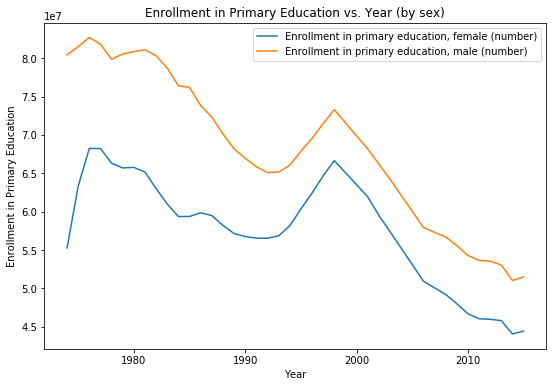

In [234]:
china_primary_by_sex.drop(columns=["Enrollment in primary education, both sexes (number)"]).plot("Year", figsize=(9,6))

plt.title('Enrollment in Primary Education vs. Year (by sex)')
plt.xlabel('Year')
plt.ylabel('Enrollment in Primary Education')
plt.legend(loc="upper right")

In [204]:
china_pupil_teach = china_data[china_data['Indicator Name'] == 'Pupil-teacher ratio in primary education (headcount basis)'].transpose()
china_life_expec = china_data[china_data['Indicator Name'] == 'School life expectancy, primary, both sexes (years)'].transpose()


china_teach_life_expec = china_pupil_teach.merge(china_life_expec, left_index=True, right_index=True)
china_teach_life_expec = china_teach_life_expec.rename(columns={244441: "Pupil-teacher ratio in primary education (headcount basis)",
                                                    244821: 'School life expectancy, primary, both sexes (years)'})
china_teach_life_expec = china_teach_life_expec.drop(["Indicator Name"])
china_teach_life_expec = china_teach_life_expec.dropna(axis=0, how="any")
china_teach_life_expec.head()

,Pupil-teacher ratio in primary education (headcount basis),"School life expectancy, primary, both sexes (years)"
1970,28.8695,5.45689
1971,29.1473,5.41504
1972,27.3778,5.49632
1973,28.5339,5.86479
1974,29.0028,6.04795


Text(0.5, 0, 'Pupil-Teacher Ratio (headcount basis)')

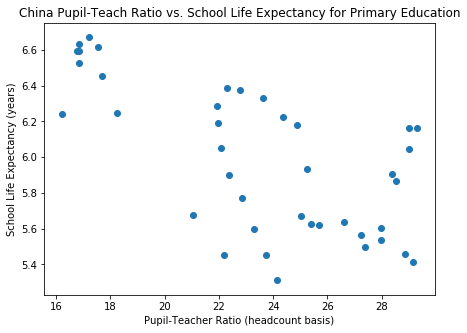

In [201]:
plt.figure(figsize=(7, 5))

plt.scatter(china_teach_life_expec["Pupil-teacher ratio in primary education (headcount basis)"],
                                    china_teach_life_expec["School life expectancy, primary, both sexes (years)"])

plt.title('China Pupil-Teach Ratio vs. School Life Expectancy for Primary Education')
plt.ylabel("School Life Expectancy (years)")
plt.xlabel("Pupil-Teacher Ratio (headcount basis)")